In [ ]:
# prompt: I uploaded ESG_return.xlsx, please import it as esg, read sheet 1 only

from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import scipy.optimize as sco
import random
from matplotlib import rc
#import matplotlib.pylab as plt
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

esg = pd.read_excel('ESG_return.xlsx', sheet_name=0)

LAMBDA = 0

In [ ]:
# prompt: Sử dụng dataframe esg: calculate each stock's mean value

# Calculate the mean value for each stock
mean_return = esg.mean()

# Print the results
mean_return


,0
FPT.VN,0.002402
GEG.VN,-0.000220
VIC.VN,-0.000004
VNM.VN,0.000039


In [ ]:
# prompt: create covariance maxtrix for the portfolio

# Calculate the covariance matrix
cov_matrix = esg.cov()

# Print the covariance matrix
cov_matrix

,FPT.VN,GEG.VN,VIC.VN,VNM.VN
FPT.VN,0.000234,0.000071,0.000036,0.000056
GEG.VN,0.000071,0.000353,0.000049,0.000023
VIC.VN,0.000036,0.000049,0.000220,0.000051
VNM.VN,0.000056,0.000023,0.000051,0.000132


In [ ]:
num_assets = 4

In [ ]:
def neg_portfolio_return(weights, MeanReturn, covarianceMatrix):
    ret = np.sum(MeanReturn * weights)
    return -ret  # Negative sign to maximize returns during minimization

# Define a function to calculate portfolio volatility (same as before)
def portfolio_variance(weights, MeanReturn, covarianceMatrix):
    var = np.dot(weights.T, np.dot(covarianceMatrix, weights))
    return var

# Constraints (same as before)
args = (mean_return, cov_matrix)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bound = (0, 1)
bounds = tuple(bound for asset in range(num_assets))

alphas = [0.2, 0.4, 0.6, 0.8]

# Store results for each alpha
opt_port_0 = []

for alpha in alphas:
    # Optimization objective function with risk aversion
    def objective_function(weights):
        neg_ret = neg_portfolio_return(weights, mean_return, cov_matrix)
        var = portfolio_variance(weights, mean_return, cov_matrix)
        return (alpha) * neg_ret + (1-alpha) * var  # Incorporate alpha

    # Optimization
    opt_0 = sco.minimize(
        objective_function,
        num_assets * [1. / num_assets,],  # Initial guess
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    opt_port_0.append(opt_0)


In [ ]:
# prompt: Show the optimal weights
port_0 = pd.DataFrame(index=['FPT.VN', 'GEG.VN', 'VIC.VN', 'VNM.VN'])

for i, alpha in enumerate(alphas):
    port_0[f'Alpha = {alpha}'] = opt_port_0[i]['x'].round(4)

port_0

,Alpha = 0.2,Alpha = 0.4,Alpha = 0.6,Alpha = 0.8
FPT.VN,0.25,0.25,1.0,1.0
GEG.VN,0.25,0.25,0.0,0.0
VIC.VN,0.25,0.25,0.0,0.0
VNM.VN,0.25,0.25,0.0,0.0


In [ ]:
# prompt: Can you create a stacked bar plot by alphas
!apt-get update
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

import matplotlib.pyplot as plt

# Assuming 'port_0' DataFrame from the previous code is available

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,196 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,626 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-s

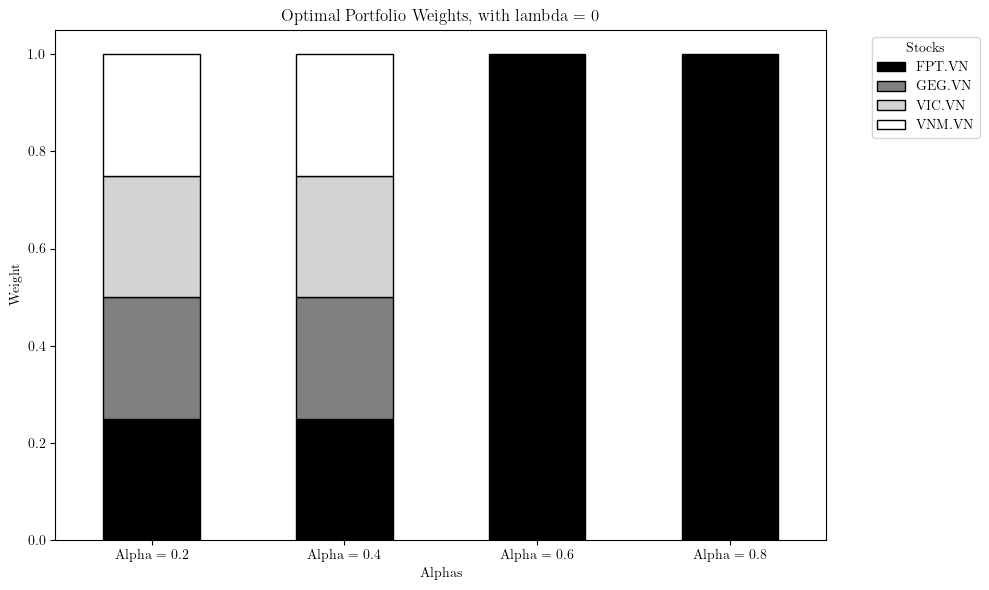

In [ ]:
# Transpose the DataFrame for easier plotting
port_0_transposed = port_0.T

# Define colors
colors = ['black', 'grey', 'lightgrey', 'white']

# Create the stacked bar plot with custom colors
ax = port_0_transposed.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Get a list of bar containers (one for each group of stacked bars)
bar_containers = ax.containers

for container in bar_containers:
    for bar in container.patches:
        bar.set_edgecolor('black')  # Set edge color to black

# Customize the plot (including legend position)
plt.title('Optimal Portfolio Weights, with lambda = 0')
plt.xlabel('Alphas')
plt.ylabel('Weight')
plt.xticks(rotation=0)
plt.legend(title='Stocks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

LAMBDA = 0.25

In [ ]:
esg_25 = pd.read_excel('ESG_return.xlsx', sheet_name=1)
mean_25 = esg_25.mean()
cov_25 = esg_25.cov()
num_25 = 4

In [ ]:
def neg_portfolio_return(weights, MeanReturn, covarianceMatrix):
    ret = np.sum(MeanReturn * weights)
    return -ret  # Negative sign to maximize returns during minimization

# Define a function to calculate portfolio volatility (same as before)
def portfolio_variance(weights, MeanReturn, covarianceMatrix):
    var = np.dot(weights.T, np.dot(covarianceMatrix, weights))
    return var

# Constraints (same as before)
args = (mean_return, cov_matrix)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bound = (0, 1)
bounds = tuple(bound for asset in range(num_25))

alphas = [0.2, 0.4, 0.6, 0.8]

# Store results for each alpha
opt_port_25 = []

for alpha in alphas:
    # Optimization objective function with risk aversion
    def objective_function(weights):
        neg_ret = neg_portfolio_return(weights, mean_25, cov_25)
        var = portfolio_variance(weights, mean_25, cov_25)
        return alpha * neg_ret + (1-alpha) * var  # Incorporate alpha

    # Optimization
    opt_25 = sco.minimize(
        objective_function,
        num_assets * [1. / num_assets,],  # Initial guess
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    opt_port_25.append(opt_25)

# Access results for each alpha
for i, alpha in enumerate(alphas):
    print(f"Optimal weights for alpha = {alpha}: {opt_port_25[i]['x']}")


Optimal weights for alpha = 0.2: [0.25 0.25 0.25 0.25]
Optimal weights for alpha = 0.4: [0.25 0.25 0.25 0.25]
Optimal weights for alpha = 0.6: [0.25 0.25 0.25 0.25]
Optimal weights for alpha = 0.8: [1.00000000e+00 0.00000000e+00 2.77555756e-16 1.31838984e-16]


In [ ]:

port_25 = pd.DataFrame(index=['FPT.VN', 'GEG.VN', 'VIC.VN', 'VNM.VN'])

for i, alpha in enumerate(alphas):
    port_25[f'Alpha = {alpha}'] = opt_port_25[i]['x']

port_25

,Alpha = 0.2,Alpha = 0.4,Alpha = 0.6,Alpha = 0.8
FPT.VN,0.25,0.25,0.25,1.000000e+00
GEG.VN,0.25,0.25,0.25,0.000000e+00
VIC.VN,0.25,0.25,0.25,2.775558e-16
VNM.VN,0.25,0.25,0.25,1.318390e-16


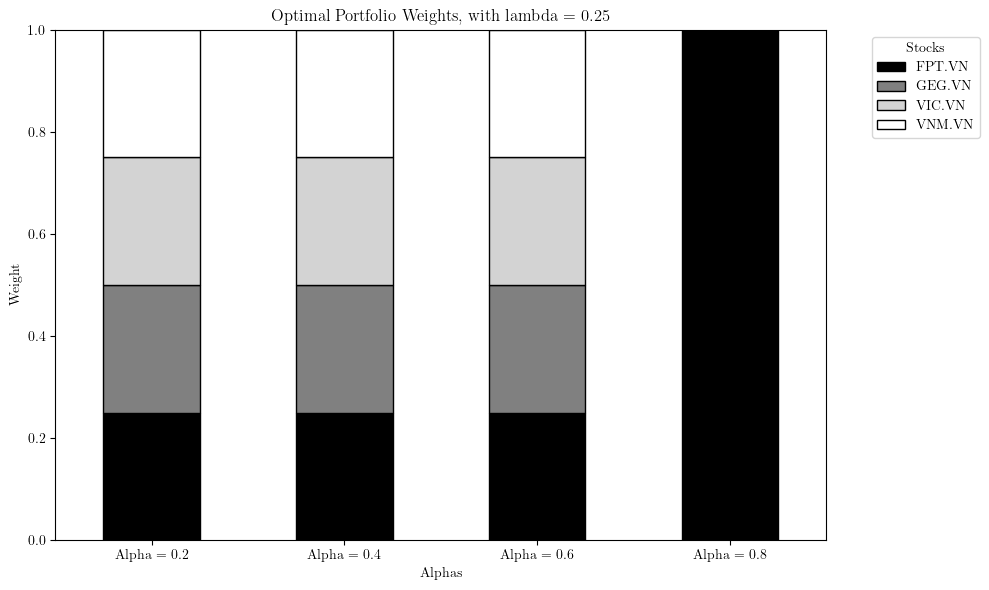

In [ ]:
# Transpose the DataFrame for easier plotting
port_25_transposed = port_25.T

# Define colors
colors = ['black', 'grey', 'lightgrey', 'white']

# Create the stacked bar plot with custom colors
ax_25 = port_25_transposed.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Get a list of bar containers (one for each group of stacked bars)
bar_25 = ax_25.containers

for container in bar_25:
    for bar in container.patches:
        bar.set_edgecolor('black')  # Set edge color to black

# Customize the plot (including legend position)
plt.title('Optimal Portfolio Weights, with lambda = 0.25')
plt.xlabel('Alphas')
plt.ylabel('Weight')
plt.xticks(rotation=0)
plt.legend(title='Stocks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

LAMBDA = 0.5

In [ ]:
esg_5 = pd.read_excel('ESG_return.xlsx', sheet_name=2)
mean_5 = esg_5.mean()
cov_5 = esg_5.cov()
num_5 = 4

In [ ]:
def neg_portfolio_return(weights, MeanReturn, covarianceMatrix):
    ret = np.sum(MeanReturn * weights)
    return -ret  # Negative sign to maximize returns during minimization

# Define a function to calculate portfolio volatility (same as before)
def portfolio_var(weights, MeanReturn, covarianceMatrix):
    var = np.dot(weights.T, np.dot(covarianceMatrix, weights))
    return var

# Constraints (same as before)
args = (mean_return, cov_matrix)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bound = (0, 1)
bounds = tuple(bound for asset in range(num_25))

alphas = [0.2, 0.4, 0.6, 0.8]

# Store results for each alpha
opt_port_5 = []

for alpha in alphas:
    # Optimization objective function with risk aversion
    def objective_function(weights):
        neg_ret = neg_portfolio_return(weights, mean_5, cov_5)
        var = portfolio_var(weights, mean_5, cov_5)
        return (alpha) * neg_ret + (1-alpha) * var  # Incorporate alpha

    # Optimization
    opt_5 = sco.minimize(
        objective_function,
        num_5 * [1. / num_5,],  # Initial guess
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    opt_port_5.append(opt_5)


In [ ]:
port_5 = pd.DataFrame(index=['FPT.VN', 'GEG.VN', 'VIC.VN', 'VNM.VN'])

for i, alpha in enumerate(alphas):
    port_5[f'Alpha = {alpha}'] = opt_port_5[i]['x'].round(4)

port_5

,Alpha = 0.2,Alpha = 0.4,Alpha = 0.6,Alpha = 0.8
FPT.VN,0.25,0.25,0.25,0.25
GEG.VN,0.25,0.25,0.25,0.25
VIC.VN,0.25,0.25,0.25,0.25
VNM.VN,0.25,0.25,0.25,0.25


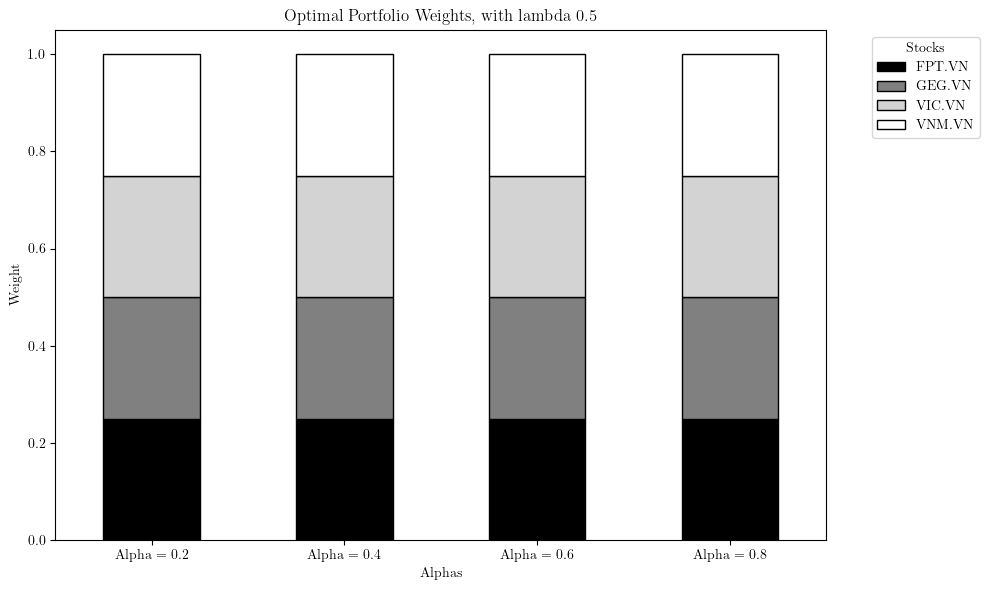

In [ ]:
# Transpose the DataFrame for easier plotting
port_5_transposed = port_5.T

# Define colors
colors = ['black', 'grey', 'lightgrey', 'white']

# Create the stacked bar plot with custom colors
ax_5 = port_5_transposed.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Get a list of bar containers (one for each group of stacked bars)
bar_5 = ax_5.containers

for container in bar_5:
    for bar in container.patches:
        bar.set_edgecolor('black')  # Set edge color to black

# Customize the plot (including legend position)
plt.title('Optimal Portfolio Weights, with lambda 0.5')
plt.xlabel('Alphas')
plt.ylabel('Weight')
plt.xticks(rotation=0)
plt.legend(title='Stocks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

LAMBDA = 0.75

In [ ]:
esg_75 = pd.read_excel('ESG_return.xlsx', sheet_name=3)
mean_75 = esg_75.mean()
cov_75 = esg_75.cov()
num_75 = 4

In [ ]:
def neg_portfolio_return(weights, MeanReturn, covarianceMatrix):
    ret = np.sum(MeanReturn * weights)
    return -ret  # Negative sign to maximize returns during minimization

# Define a function to calculate portfolio volatility (same as before)
def portfolio_volatility(weights, MeanReturn, covarianceMatrix):
    std = np.sqrt(np.dot(weights.T, np.dot(covarianceMatrix, weights)))
    return std

# Constraints (same as before)
args = (mean_75, cov_75)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bound = (0, 1)
bounds = tuple(bound for asset in range(num_75))

alphas = [0.2, 0.4, 0.6, 0.8]

# Store results for each alpha
opt_port_75 = []

for alpha in alphas:
    # Optimization objective function with risk aversion
    def objective_function(weights):
        neg_ret = neg_portfolio_return(weights, mean_75, cov_75)
        var = portfolio_variance(weights, mean_75, cov_75)
        return (alpha) * neg_ret + (1-alpha) * var  # Incorporate alpha

    # Optimization
    opt_75 = sco.minimize(
        objective_function,
        num_75 * [1. / num_75,],  # Initial guess
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    opt_port_75.append(opt_75)

# Access results for each alpha
for i, alpha in enumerate(alphas):
    print(f"Optimal weights for alpha = {alpha}: {opt_port_75[i]['x']}")


Optimal weights for alpha = 0.2: [0.25 0.25 0.25 0.25]
Optimal weights for alpha = 0.4: [0.25 0.25 0.25 0.25]
Optimal weights for alpha = 0.6: [0.25 0.25 0.25 0.25]
Optimal weights for alpha = 0.8: [0.25 0.25 0.25 0.25]


In [ ]:
port_75 = pd.DataFrame(index=['FPT.VN', 'GEG.VN', 'VIC.VN', 'VNM.VN'])

for i, alpha in enumerate(alphas):
    port_75[f'Alpha = {alpha}'] = opt_port_75[i]['x'].round(4)  # Round to 4 decimals

port_75

,Alpha = 0.2,Alpha = 0.4,Alpha = 0.6,Alpha = 0.8
FPT.VN,0.25,0.25,0.25,0.25
GEG.VN,0.25,0.25,0.25,0.25
VIC.VN,0.25,0.25,0.25,0.25
VNM.VN,0.25,0.25,0.25,0.25


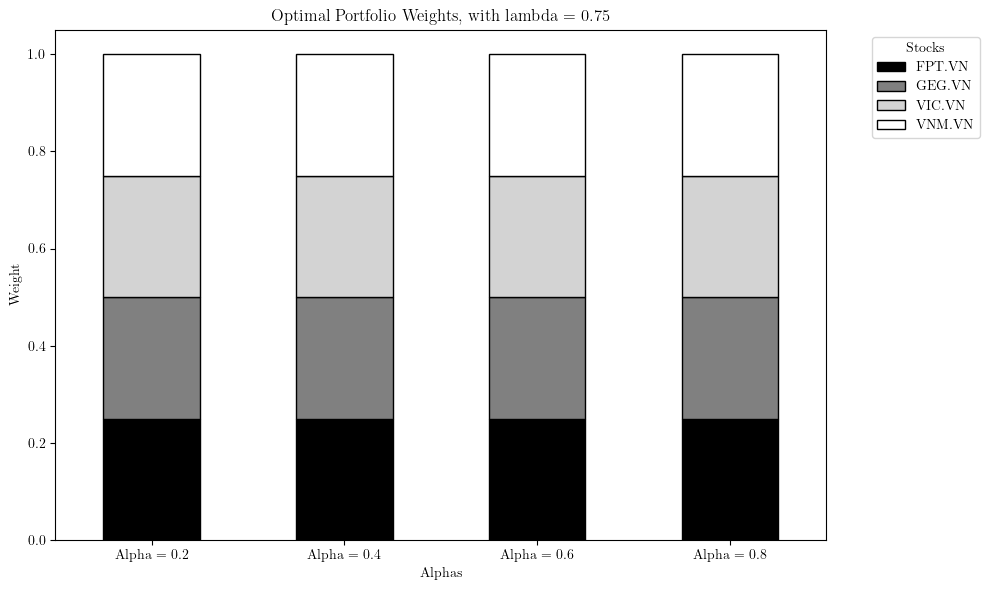

In [ ]:
# Transpose the DataFrame for easier plotting
port_75_transposed = port_75.T

# Define colors
colors = ['black', 'grey', 'lightgrey', 'white']

# Create the stacked bar plot with custom colors
ax_75 = port_75_transposed.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Get a list of bar containers (one for each group of stacked bars)
bar_75 = ax_75.containers

for container in bar_75:
    for bar in container.patches:
        bar.set_edgecolor('black')  # Set edge color to black

# Customize the plot (including legend position)
plt.title('Optimal Portfolio Weights, with lambda = 0.75')
plt.xlabel('Alphas')
plt.ylabel('Weight')
plt.xticks(rotation=0)
plt.legend(title='Stocks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [ ]:
r = esg.std()
r['FPT.VN']
r_25 = esg_25.std()
r_5 = esg_5.std()
r_75 = esg_75.std()

Scatter plot

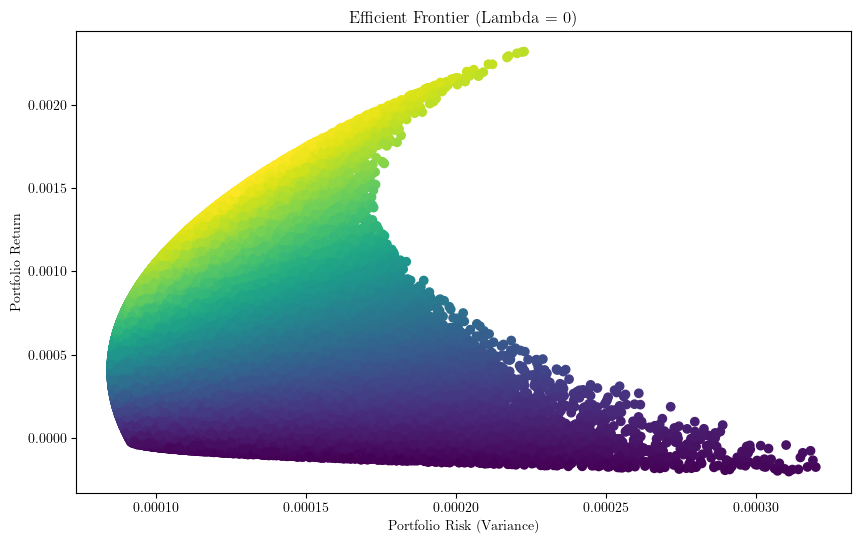

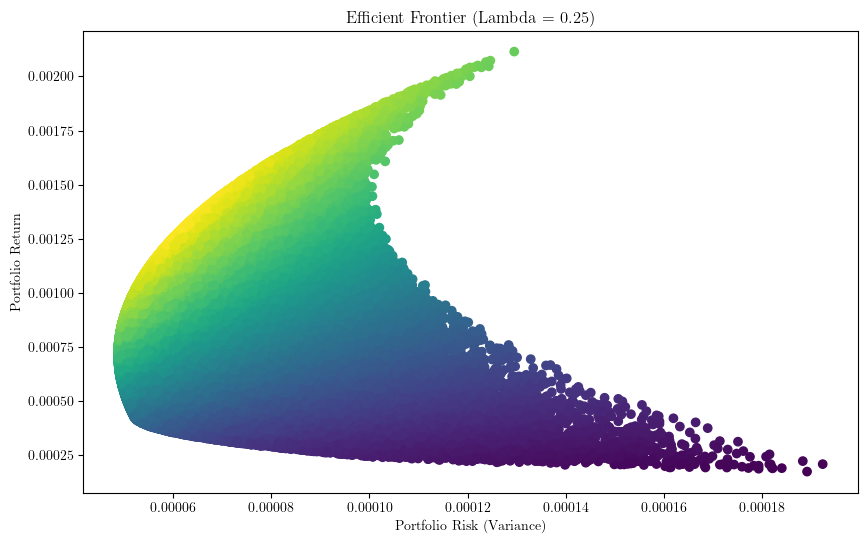

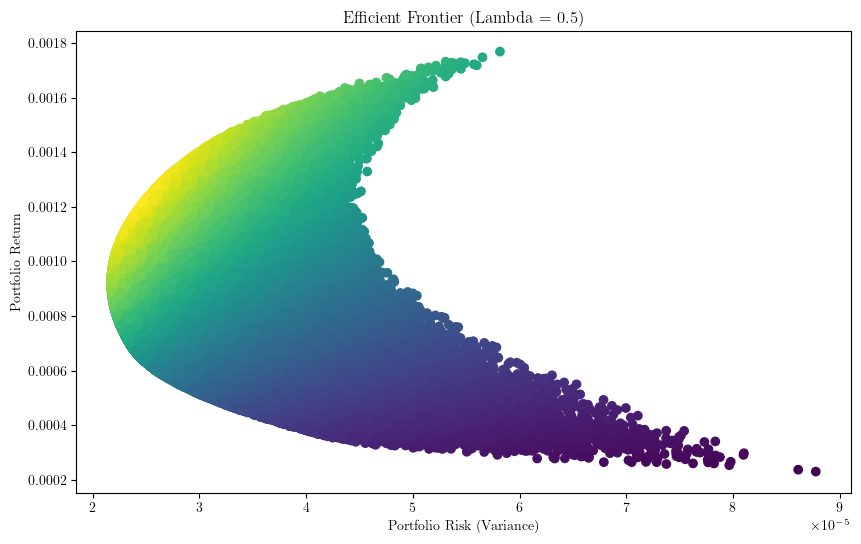

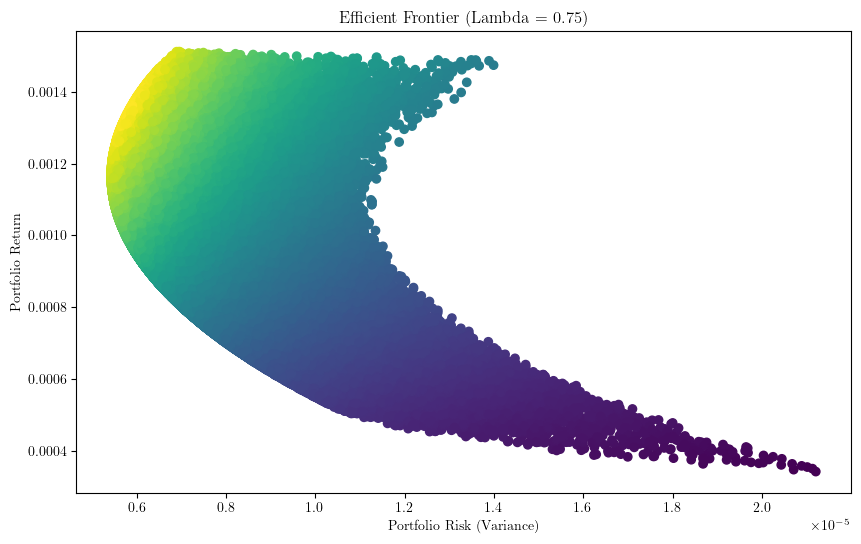

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

# ... (Your previous code to calculate opt_port_0, opt_port_25, opt_port_5, opt_port_75, etc. remains the same) ...

# Function to calculate portfolio statistics (same as before)
def portfolio_stats(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    return portfolio_return, portfolio_var

# Number of portfolios to simulate
num_portfolios = 500000

# Lists to store portfolio returns and risks
portfolio_returns = []
portfolio_risks = []

# Iterate through lambdas
lambdas = [0, 0.25, 0.5, 0.75]
optimal_portfolios = [opt_port_0, opt_port_25, opt_port_5, opt_port_75]
mean_rets = [mean_return, mean_25, mean_5, mean_75]
cov_mats = [cov_matrix, cov_25, cov_5, cov_75]

for lambda_val, opt_portfolio, mean_ret, cov_mat in zip(lambdas, optimal_portfolios, mean_rets, cov_mats):
    for _ in range(num_portfolios):
        # Generate random weights
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)

        # Calculate portfolio return and risk
        portfolio_return, portfolio_risk = portfolio_stats(weights, mean_ret, cov_mat)

        # Append results to lists
        portfolio_returns.append(portfolio_return)
        portfolio_risks.append(portfolio_risk)

    # Convert lists to NumPy arrays for element-wise division
    portfolio_returns = np.array(portfolio_returns)
    portfolio_risks = np.array(portfolio_risks)

    # Plot the Efficient Frontier for the current lambda
    plt.figure(figsize=(10, 6))
    plt.scatter(portfolio_risks, portfolio_returns, c=portfolio_returns / portfolio_risks, cmap='viridis')  # Risk-adjusted returns as color
    plt.title(f'Efficient Frontier (Lambda = {lambda_val})')
    plt.xlabel('Portfolio Risk (Variance)')
    plt.ylabel('Portfolio Return')

    # Plot optimal portfolios for different alphas
    #for alpha_portfolio in opt_portfolio:
        #ret, risk = portfolio_stats(alpha_portfolio['x'], mean_ret, cov_mat)
        #plt.scatter(risk, ret)  # Highlight optimal portfolios

    plt.show()

    # Reset lists for the next lambda
    portfolio_returns = []
    portfolio_risks = []

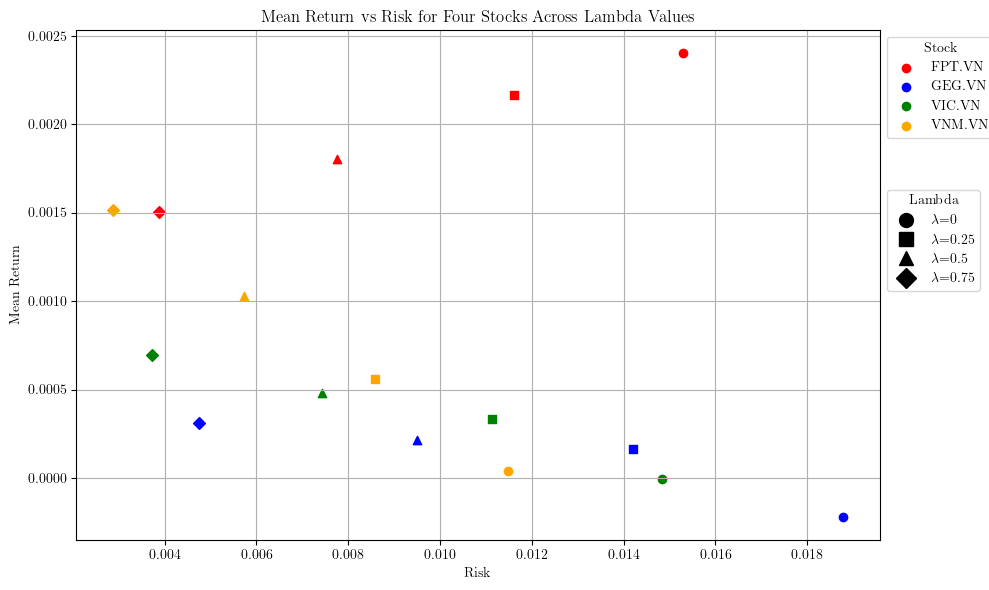

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines # Import for custom legend handles


# Sample data (replace with your actual data)
lambdas = [0, 0.25, 0.5, 0.75]
stock_names = ['FPT.VN', 'GEG.VN', 'VIC.VN', 'VNM.VN']

# Example data structure (replace with your calculated risk and return data)
data = {
    0: {
        'FPT.VN': {'risk': r['FPT.VN'], 'return': mean_return['FPT.VN']},
        'GEG.VN': {'risk': r['GEG.VN'], 'return': mean_return['GEG.VN']},
        'VIC.VN': {'risk': r['VIC.VN'], 'return': mean_return['VIC.VN']},
        'VNM.VN': {'risk': r['VNM.VN'], 'return': mean_return['VNM.VN']},
    },
    0.25: {  # ... and so on for other lambdas
        'FPT.VN': {'risk': r_25['FPT.VN'], 'return': mean_25['FPT.VN']},
        'GEG.VN': {'risk': r_25['GEG.VN'], 'return': mean_25['GEG.VN']},
        'VIC.VN': {'risk': r_25['VIC.VN'], 'return': mean_25['VIC.VN']},
        'VNM.VN': {'risk': r_25['VNM.VN'], 'return': mean_25['VNM.VN']},
    },
    0.5: {
        'FPT.VN': {'risk': r_5['FPT.VN'], 'return': mean_5['FPT.VN']},
        'GEG.VN': {'risk': r_5['GEG.VN'], 'return': mean_5['GEG.VN']},
        'VIC.VN': {'risk': r_5['VIC.VN'], 'return': mean_5['VIC.VN']},
        'VNM.VN': {'risk': r_5['VNM.VN'], 'return': mean_5['VNM.VN']},

    },
    0.75: {
        'FPT.VN': {'risk': r_75['FPT.VN'], 'return': mean_75['FPT.VN']},
        'GEG.VN': {'risk': r_75['GEG.VN'], 'return': mean_75['GEG.VN']},
        'VIC.VN': {'risk': r_75['VIC.VN'], 'return': mean_75['VIC.VN']},
        'VNM.VN': {'risk': r_75['VNM.VN'], 'return': mean_75['VNM.VN']},
    }
}


# Colors for different stocks
colors = {
    'FPT.VN': 'red',
    'GEG.VN': 'blue',
    'VIC.VN': 'green',
    'VNM.VN': 'orange'
}

markers = ['o', 's', '^', 'D']

plt.figure(figsize=(10, 6))

# Define custom legend handles for markers
marker_handles = [
    mlines.Line2D([], [], color='black', marker=m, linestyle='None',
                  markersize=10, label=f'$\lambda$={l}')
    for m, l in zip(markers, lambdas)
]


# Iterate through stocks and plot the points
for stock in stock_names:
    for i, lam in enumerate(lambdas):
        plt.scatter(
            data[lam][stock]['risk'],
            data[lam][stock]['return'],
            color=colors[stock],
            marker=markers[i],
            label=f'{stock}' if i == 0 else ""  # Label only once per stock
        )

plt.xlabel('Risk')
plt.ylabel('Mean Return')
plt.title('Mean Return vs Risk for Four Stocks Across Lambda Values')

# Add legends
stock_legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Stock')  # Legend for stocks
plt.gca().add_artist(stock_legend)  # Keep stock legend

# Add legend for markers
plt.legend(handles=marker_handles, loc='upper left', bbox_to_anchor=(1, 0.7), title='Lambda')

plt.grid(True)
plt.tight_layout()
plt.show()